# EX2


## Data Analysis using simple plots

- Review the examples of basic visualization using Python libraries and Pandas.

## Advertising data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

A toy dataset for your exploratory data analysis:

./data/Advertising.csv

In [32]:
import pandas as pd

In [33]:
# read CSV file stored in the current directory and save the results
data = pd.read_csv('./data/Advertising.csv', skipinitialspace=True, index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
3/11/19,230.1,37.8,69.2,22.1
3/12/19,44.5,39.3,45.1,10.4
3/13/19,17.2,45.9,69.3,9.3
3/14/19,151.5,41.3,58.5,18.5
3/15/19,180.8,10.8,58.4,12.9


What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

In [34]:
#display all data. You can uncomment the code in the next line

display(data)

data.shape

,TV,Radio,Newspaper,Sales
3/11/19,230.1,37.8,69.2,22.1
3/12/19,44.5,39.3,45.1,10.4
3/13/19,17.2,45.9,69.3,9.3
3/14/19,151.5,41.3,58.5,18.5
3/15/19,180.8,10.8,58.4,12.9
...,...,...,...,...
9/22/19,38.2,3.7,13.8,7.6
9/23/19,94.2,4.9,8.1,9.7
9/24/19,177.0,9.3,6.4,12.8
9/25/19,283.6,42.0,66.2,25.5


(200, 4)

## Part 1 Tasks

Create cells to solve each of the following problems.

(1) For each field of the data, what is the mean of the data? What is the median? Are there any dataset has mode value?

(2) For each field of the data, give the five-number summary, minimum, the first quartile (Q1), median, the third quartile (Q3), and maximum of the data.

(3) For each field of the data, visulize a boxplot of the data and compare it to your answer in (b).

(4) For Sales, visualize distribution of the data using histogram. Comment on the data’s modality (i.e., bimodal, trimodal, etc.)

(5) For Sales, visualize the trend of the data over time using a graph.

(6) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), calculate the Pearson's correlation coefficient factor r.

(7) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), visualize scatter graph.

(8) Discuss what the differences are between the three: (a) boxplot, (b) histogram, and (c) scatter plot with respect to founding.

## Part 1.1

In [35]:
# Author:   Hongru He
# Date:     2026/01/11
# Task:     EX2


# Mean of each column
data.mean()

# Median of each column
data.median()
summary = pd.DataFrame({
    "Mean": data.mean(),
    "Median": data.median()
})

summary

,Mean,Median
TV,147.0425,149.75
Radio,23.2640,22.90
Newspaper,30.5540,25.75
Sales,14.0225,12.90


In [36]:
# Mode of each column
data.mode()
data.mode().count()

TV           10
Radio         2
Newspaper     3
Sales         1
dtype: int64

## Part 1.2

In [37]:
# The simplest way
# data.describe()

# Customizing required data
five_number_summary = pd.DataFrame({
    "Min": data.min(),
    "Q1 (25%)": data.quantile(0.25),
    "Median": data.median(),
    "Q3 (75%)": data.quantile(0.75),
    "Max": data.max()
})

five_number_summary

,Min,Q1 (25%),Median,Q3 (75%),Max
TV,0.7,74.375,149.75,218.825,296.4
Radio,0.0,9.975,22.90,36.525,49.6
Newspaper,0.3,12.750,25.75,45.100,114.0
Sales,1.6,10.375,12.90,17.400,27.0


## Part 1.3

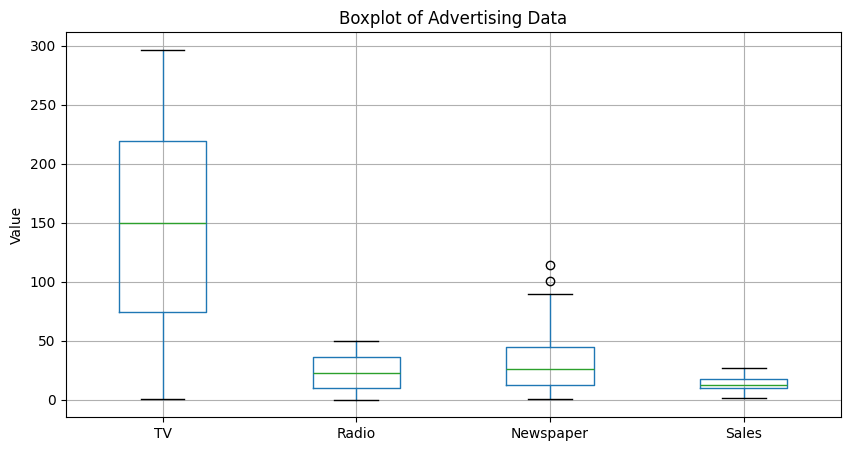

In [38]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.figure(figsize=(10, 5))
data.boxplot()
plt.title("Boxplot of Advertising Data")
plt.ylabel("Value")
plt.show()

## What's in the boxplot?
| Boxplot part    | Five-number summary |
|-----------------|---------------------|
| Bottom whisker  | Minimum             |
| Bottom of box   | Q1 (25%)            |
| Line inside box | Median (50%)        |
| Top of box      | Q3 (75%)            |
| Top whisker     | Maximum             |
| Points beyond whiskers | Outliers            |

So, the boxplot is a visual version of my answer of Part 1.2

## Part 1.4

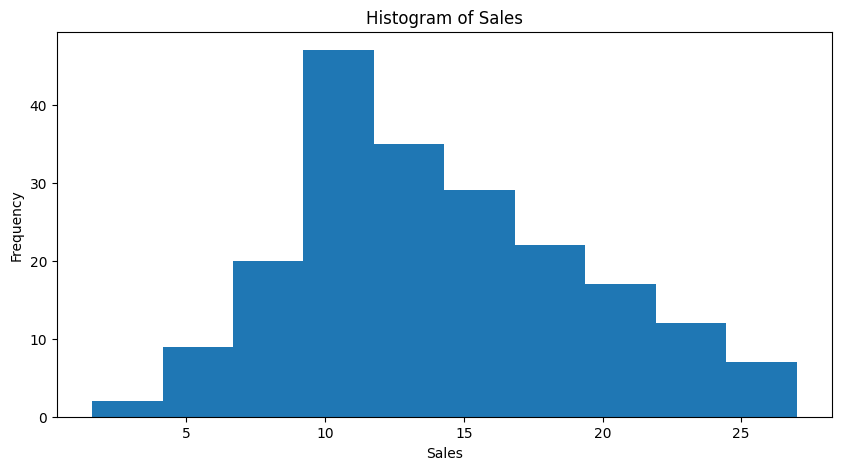

In [39]:
plt.figure(figsize=(10, 5))
plt.hist(data["Sales"], bins=10)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Histogram of Sales")
plt.show()

### Comment on the data’s modality
The histogram of Sales shows a single prominent peak, indicating that the distribution is unimodal. Most sales values are concentrated around the center of the distribution, with fewer observations at both lower and higher sales levels.

## Part 1.5

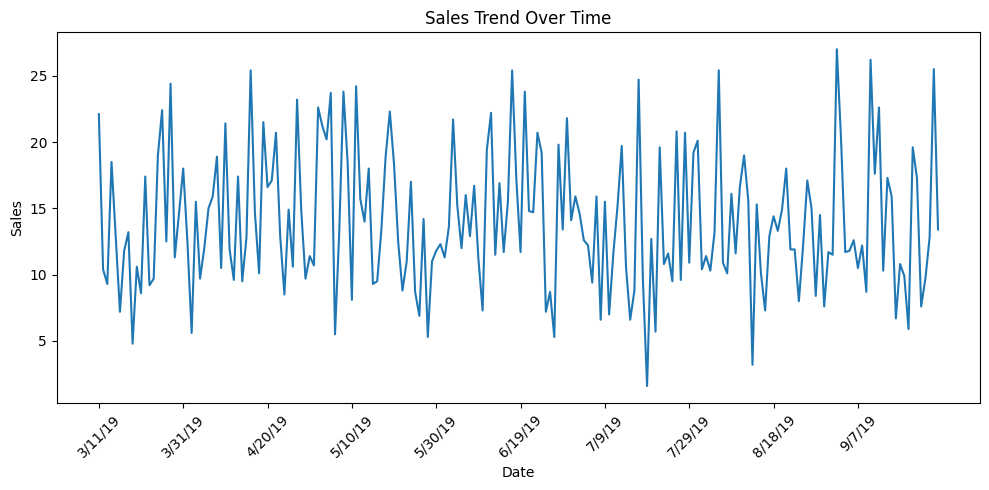

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(data.index, data["Sales"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trend Over Time")
plt.xticks(data.index[::20], rotation=45)   # Show every 20th date
plt.tight_layout()
plt.show()

## Part 1.6

In [41]:
# The simplest way
# data.corr()

# Pearson correlation between each advertising channel and Sales
correlations = pd.Series({
    "TV–Sales": data["TV"].corr(data["Sales"]),
    "Radio–Sales": data["Radio"].corr(data["Sales"]),
    "Newspaper–Sales": data["Newspaper"].corr(data["Sales"])
})
correlations.name = "r values"
correlations

TV–Sales           0.782224
Radio–Sales        0.576223
Newspaper–Sales    0.228299
Name: r values, dtype: float64

## Part 1.7

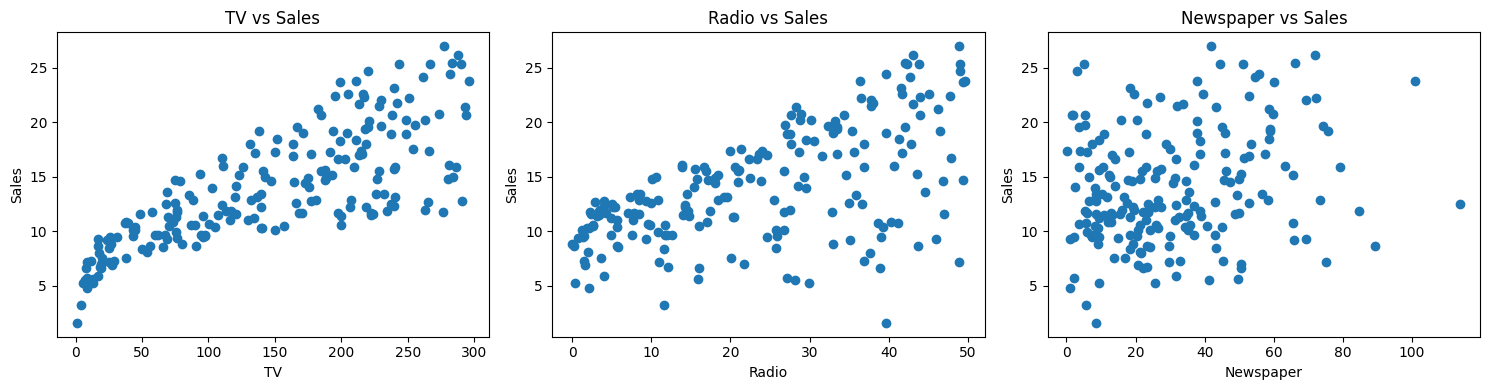

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# TV vs Sales
axes[0].scatter(data["TV"], data["Sales"])
axes[0].set_xlabel("TV")
axes[0].set_ylabel("Sales")
axes[0].set_title("TV vs Sales")

# Radio vs Sales
axes[1].scatter(data["Radio"], data["Sales"])
axes[1].set_xlabel("Radio")
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio vs Sales")

# Newspaper vs Sales
axes[2].scatter(data["Newspaper"], data["Sales"])
axes[2].set_xlabel("Newspaper")
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper vs Sales")

plt.tight_layout()
plt.show()

## Part 1.8
A **boxplot** is useful for understanding the distribution of a single feature. It clearly shows the median, minimum, maximum, first quartile (Q1), and third quartile (Q3), making it easy to compare spread, central tendency, and potential outliers at a glance.

A **histogram** is effective for visualizing the frequency distribution of a single feature. It shows how often values fall into different ranges and helps identify the shape of the distribution, such as the number of peaks (modality), skewness, and concentration of data.

A **scatter plot** is useful for examining the relationship between a pair of features. It visually shows whether there is a correlation between the two variables and provides insight into the direction and strength of their relationship, as well as any general trend or pattern between them.

## Part 2
It is good practice to write a summary of your findings from data anlaysis.

### Summary of Data Analysis Findings

In this analysis, the Advertising dataset was explored using descriptive statistics and data visualization techniques to understand the characteristics of the data and the relationships between advertising channels and Sales.

Descriptive statistics, including the mean, median, and five-number summary, were computed for each variable. Boxplots confirmed these summaries visually by clearly displaying the median, quartiles, range, and potential outliers for each feature. Histograms were used to examine the distribution of Sales, which showed a unimodal distribution with most values concentrated around the center.

To analyze relationships between variables, Pearson’s correlation coefficients were calculated between Sales and each advertising channel. The results showed a strong positive correlation between TV advertising and Sales, a moderate positive correlation between Radio advertising and Sales, and a weak correlation between Newspaper advertising and Sales. These findings were further supported by scatter plots, which visually demonstrated the strength and direction of each relationship.

Finally, a time series plot of Sales over time showed noticeable fluctuations but no clear long-term trend. Overall, the analysis indicates that TV and Radio advertising are more strongly associated with Sales compared to Newspaper advertising, and the applied visualizations and statistical measures consistently support these conclusions.

### Resources

#### Boxplot
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51


- matplotlib.pyplot boxplot demo
https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html


#### matplotlib.pyplot
- scatter plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html


- histogram plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist.html


#### pandas DataFrame
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html


- describe()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html


- corr()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html


- hist()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html


- plot.scatter()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html


- pivot()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html